In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'  # Specify the GPU device index
import cv2
import random
import itertools


from PIL import Image
from keras.preprocessing import image


import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
def load_images(directory):
    image_array = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            
            # Load and resize the image
            img = cv2.imread(filepath)
            img = cv2.resize(img, (224, 224))
            
            image_array.append(img)
    
    return image_array


In [69]:
normal_dir= 'D:/Latihan_Python/Datasets/Split_Data/Normal'  # Normal CXR Image Dataset
viral_dir= 'D:/Latihan_Python/Datasets/Split_Data/Viral Pneumonia'    # Viral Pneumonia CXR Image Dataset
covid_dir= 'D:/Latihan_Python/Datasets/Split_Data/COVID'    # COVID-19 CXR Image Dataset

normal_dataset = load_images(normal_dir)
viral_dataset = load_images(viral_dir)
covid_dataset = load_images(covid_dir)

In [71]:
print("The Dataset which is made up of {} Image Arrays has: ".format(len(normal_dataset) + len(viral_dataset) + len(covid_dataset)))
print('{} Normal CXR Image Arrays'.format(len(normal_dataset)))
print('{} Viral Pneumonia CXR Image Arrays'.format(len(viral_dataset)))
print('{} COVID-19 CXR Image Arrays'.format(len(covid_dataset)))

The Dataset which is made up of 2952 Image Arrays has: 
988 Normal CXR Image Arrays
989 Viral Pneumonia CXR Image Arrays
975 COVID-19 CXR Image Arrays


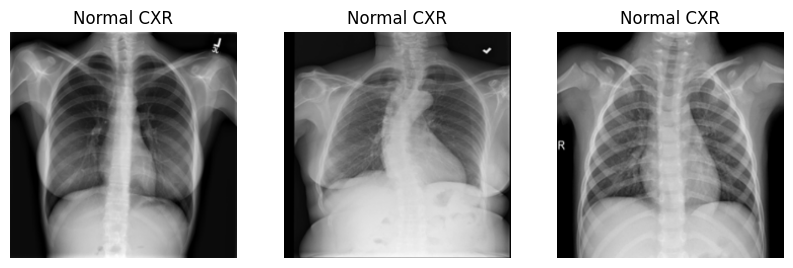

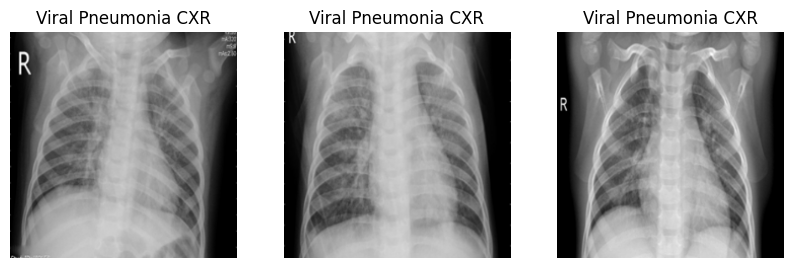

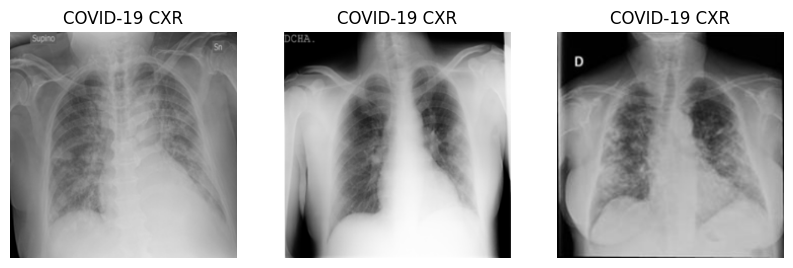

In [72]:

class_names = {0: "Normal CXR", 1: "Viral Pneumonia CXR", 2: "COVID-19 CXR"}

# Normal CXR Sampling
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(normal_dataset[i], cmap="gray")
    plt.title(class_names[0])
    plt.axis("off")

# Viral Pneumonia CXR Sampling
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(viral_dataset[i], cmap="gray")
    plt.title(class_names[1])
    plt.axis("off")

# COVID-19 CXR Sampling
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(covid_dataset[i], cmap="gray")
    plt.title(class_names[2])
    plt.axis("off")

plt.show()

In [73]:
# def white_balance(channel, perc = 0.05):
#     mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
#     channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
#     return channel

################################### IGNORE THESE, UNUSED, THIS ENHANCEMENT TECHNIQUE CAN BE USE FOR FURTHER RESEARCH #####################

In [74]:
# def clahe():
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
#     return clahe

################################### IGNORE THESE, UNUSED, THIS ENHANCEMENT TECHNIQUE CAN BE USE FOR FURTHER RESEARCH #####################

In [75]:
# def image_enhancer(image_arrays):
    
#     """
#     Argument: 
#     image_arrays: a list containing arrays of images to be normalized
    
#     returns:
#     enhanced_images: a list of the enhanced images arrays
#     """
#     enchanced_images = []
    
#     for image in image_arrays:
        
#         # White Balance
#         image_WB  = np.dstack([white_balance(channel, 0.05) for channel in cv2.split(image)] )
#         gray_image = cv2.cvtColor(image_WB, cv2.COLOR_RGB2GRAY)

#         # CLAHE
#         clahe_function = clahe()
#         image_clahe = clahe_function.apply(gray_image)
#         image = cv2.cvtColor(image_clahe, cv2.COLOR_GRAY2RGB)
        
#         enchanced_images.append(image)
    
#     return enchanced_images

################################### IGNORE THESE, UNUSED, THIS ENHANCEMENT TECHNIQUE CAN BE USE FOR FURTHER RESEARCH #####################

In [76]:
# normal_dataset_enhanced = image_enhancer(normal_dataset) 
# viral_dataset_enhanced = image_enhancer(viral_dataset)
# covid_dataset_enhanced = image_enhancer(covid_dataset)

################################### IGNORE THESE, UNUSED, THIS ENHANCEMENT TECHNIQUE CAN BE USE FOR FURTHER RESEARCH #####################

(-0.5, 223.5, 223.5, -0.5)

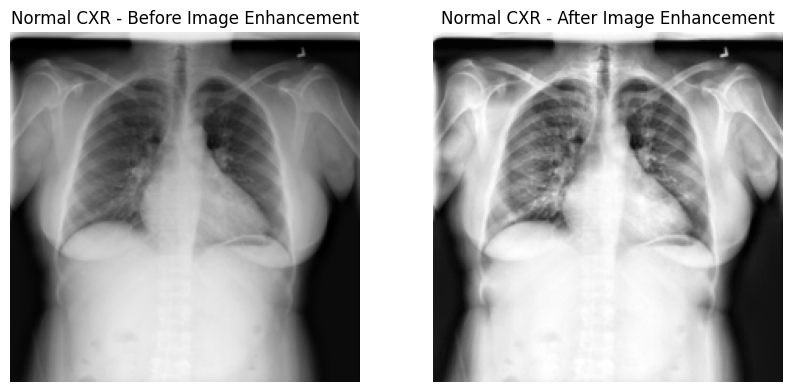

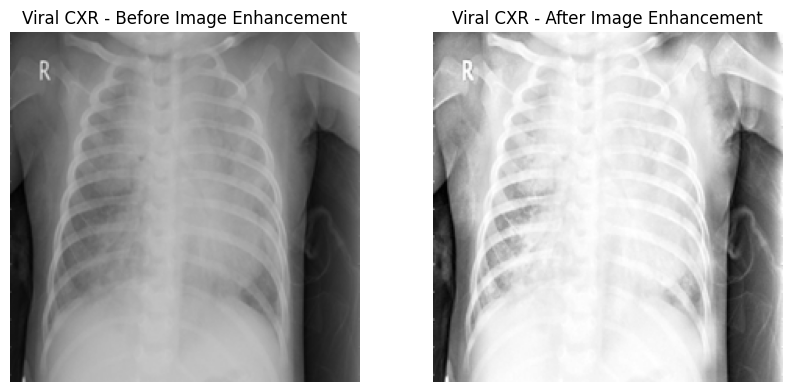

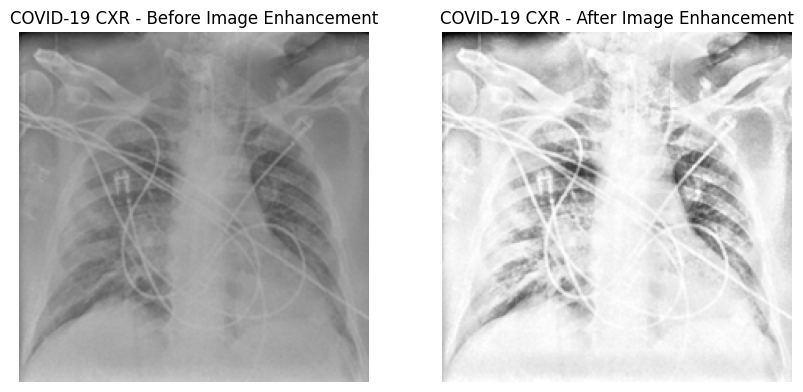

In [77]:
# # Normal CXR Sampling
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(2, 2, 1)
# plt.imshow(normal_dataset[100], cmap = "gray")
# plt.title("Normal CXR - Before Image Enhancement")
# plt.axis("off")

# ax = plt.subplot(2, 2, 2)
# plt.imshow(normal_dataset_enhanced[100], cmap = "gray")
# plt.title("Normal CXR - After Image Enhancement")
# plt.axis("off")
    
# # Viral Pneumonia CXR Sampling
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(2, 2, 1)
# plt.imshow(viral_dataset[100], cmap = "gray")
# plt.title("Viral CXR - Before Image Enhancement")
# plt.axis("off")

# ax = plt.subplot(2, 2, 2)
# plt.imshow(viral_dataset_enhanced[100], cmap = "gray")
# plt.title("Viral CXR - After Image Enhancement")
# plt.axis("off")
    
# # COVID-19 CXR Sampling
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(2, 2, 1)
# plt.imshow(covid_dataset[100], cmap = "gray")
# plt.title("COVID-19 CXR - Before Image Enhancement")
# plt.axis("off")

# ax = plt.subplot(2, 2, 2)
# plt.imshow(covid_dataset_enhanced[100], cmap = "gray")
# plt.title("COVID-19 CXR - After Image Enhancement")
# plt.axis("off")


################################### IGNORE THESE, UNUSED, THIS ENHANCEMENT TECHNIQUE CAN BE USE FOR FURTHER RESEARCH #####################

In [78]:
def normalizer(image_arrays):

    """
    Argument: 
        image_arrays: array of images to be normalized
    
    returns:
        normalized_images_array: array of the normalized images' arrays
    """
    # Create an empty list to store normalized arrays
    norm_image_arrays = []
    
    # Iterate over all the image arrays and normalize them before storing them into our predefined list
    for image_array in image_arrays:
        norm_image_array = image_array / 255.0
        norm_image_arrays.append(norm_image_array)
    
    return norm_image_arrays

In [79]:
normal_dataset_normalized = normalizer(normal_dataset)
viral_dataset_normalized = normalizer(viral_dataset)
covid_dataset_normalized = normalizer(covid_dataset)

In [80]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def split_and_merge_function(image_arrays, split_factor=[0.7, 0.15, 0.15]):
    datasets = {}
    train_data, validation_data, test_data = [], [], []
    train_labels, validation_labels, test_labels = [], [], []
    
    for image_array_id, image_array in enumerate(image_arrays):
        labels = [image_array_id] * len(image_array)
        
        # Split the data and labels into train, validation, and test sets
        train_data_temp, test_data_temp, train_labels_temp, test_labels_temp = train_test_split(image_array, labels, train_size=split_factor[0], random_state=42)
        validation_data_temp, test_data_temp, validation_labels_temp, test_labels_temp = train_test_split(test_data_temp, test_labels_temp, train_size=split_factor[1] / (split_factor[1] + split_factor[2]), random_state=42)
        
        # Merge the data and labels into the respective lists
        train_data.extend(train_data_temp)
        train_labels.extend(train_labels_temp)
        validation_data.extend(validation_data_temp)
        validation_labels.extend(validation_labels_temp)
        test_data.extend(test_data_temp)
        test_labels.extend(test_labels_temp)
    
    # Store the train, validation, and test datasets into the datasets dictionary
    datasets['train_dataset'] = np.array(train_data)
    datasets['validation_dataset'] = np.array(validation_data)
    datasets['test_dataset'] = np.array(test_data)
    
    # Convert labels from label-encoding to one-hot encoding and store in the datasets dictionary
    datasets['train_labels'] = to_categorical(np.array(train_labels))
    datasets['validation_labels'] = to_categorical(np.array(validation_labels))
    datasets['test_labels'] = to_categorical(np.array(test_labels))
        
    return datasets


In [81]:
image_arrays = [normal_dataset_normalized, viral_dataset_normalized, covid_dataset_normalized]
datasets = split_and_merge_function(image_arrays, split_factor = [0.7, 0.15, 0.15])

In [82]:
train_dataset = datasets['train_dataset']
validation_dataset = datasets['validation_dataset']
test_dataset = datasets['test_dataset']
train_labels = datasets['train_labels'] 
validation_labels = datasets['validation_labels']
test_labels = datasets['test_labels']

In [83]:
print("The Dataset which is made up of {} Image Arrays has been splitted into:".format(len(train_dataset) + len(validation_dataset) + len(test_dataset)))
print('{} Training Image Arrays'.format(len(train_dataset)))
print('{} Validation Image Arrays'.format(len(validation_dataset)))
print('{} Test Image Arrays'.format(len(test_dataset)))

The Dataset which is made up of 2952 Image Arrays has been splitted into:
2065 Training Image Arrays
442 Validation Image Arrays
445 Test Image Arrays


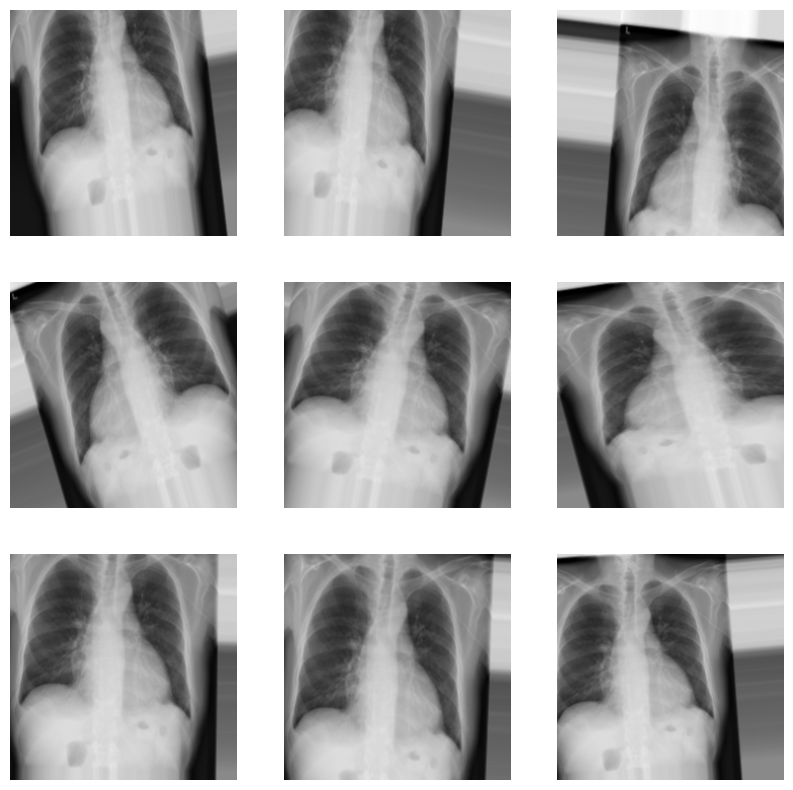

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation settings
data_augmentation = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to range [0, 1]
    rotation_range=20,        # Rotate images randomly within the range of 20 degrees
    width_shift_range=0.2,    # Shift the width of the image randomly by a fraction of 0.2
    height_shift_range=0.2,   # Shift the height of the image randomly by a fraction of 0.2
    shear_range=0.2,          # Apply shear transformation randomly within the range of 0.2
    zoom_range=0.2,           # Apply random zooming to the images within the range of 0.2
    horizontal_flip=True,     # Perform random horizontal flipping of the images
    fill_mode='nearest',      # Use the nearest pixel to fill any newly created pixels during transformations
)

# Generate augmented images from a single image
first_image = train_dataset[6]

# Apply data augmentation and display augmented images
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation.apply_transform(first_image, data_augmentation.get_random_transform(first_image.shape))
    augmented_image = (augmented_image * 255).astype(np.uint8)  # Scale back to uint8 range
    plt.imshow(augmented_image)
    plt.axis('off')

plt.show()


In [102]:
from tensorflow.keras.applications import MobileNet

def make_mobilenet_model(image_size, num_classes):
    input_shape = image_size + (3,)

    base_model = MobileNet(
        input_shape=input_shape,
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(units=num_classes, activation= 'softmax')
    ])

    return model

In [103]:
# Define a model using the make_model function
image_size = (224,224)
mobilenet_model = make_mobilenet_model(image_size, num_classes = 3)

# Preview the Model Summary
mobilenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [105]:
base_learning_rate = 0.001
optimizer = Adam(learning_rate=base_learning_rate)
initial_epochs = 50
batch_size = 64
loss = 'categorical_crossentropy'
metrics = ['accuracy']
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=8, verbose=1, min_lr=2e-6)

mobilenet_model.compile(optimizer=optimizer, 
                        loss=loss, 
                        metrics=metrics)

In [106]:
# Generate augmented images on-the-fly using the ImageDataGenerator
train_generator = data_augmentation.flow(
    x=train_dataset,
    y=train_labels,
    batch_size=batch_size,
    shuffle=True
)

In [107]:
mobilenet_history_freeze = mobilenet_model.fit(train_dataset,
                                               train_labels,
                                               batch_size=batch_size,
                                               epochs=initial_epochs,
                                               validation_data=(validation_dataset, validation_labels),
                                               callbacks=[callback, reduce_lr],
                                               shuffle=True
)

Epoch 1/50
33/33 [==============================] - 201s 6s/step - loss: 0.7509 - accuracy: 0.6678 - val_loss: 0.4752 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 114s 3s/step - loss: 0.4360 - accuracy: 0.8252 - val_loss: 0.3622 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 117s 4s/step - loss: 0.3528 - accuracy: 0.8562 - val_loss: 0.3245 - val_accuracy: 0.8778 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 119s 4s/step - loss: 0.3255 - accuracy: 0.8581 - val_loss: 0.2989 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 121s 4s/step - loss: 0.3035 - accuracy: 0.8794 - val_loss: 0.2793 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 127s 4s/step - loss: 0.2849 - accuracy: 0.8872 - val_loss: 0.2626 - val_accuracy: 0.9072 - lr: 0.0010
Epoch 7/50
33/33 [==============================] - 118s 4s/step - loss: 0.2

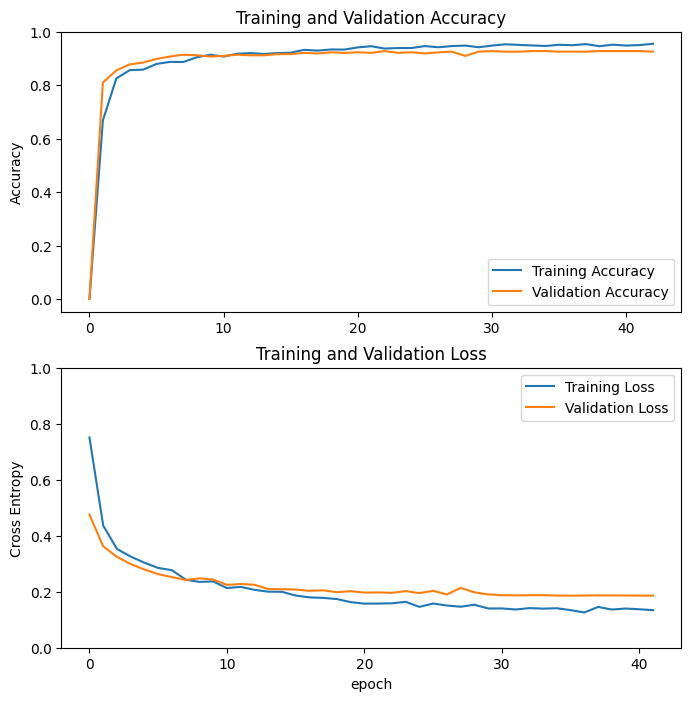

In [108]:
acc = [0.] + mobilenet_history_freeze.history['accuracy']
val_acc = [0.] + mobilenet_history_freeze.history['val_accuracy']

loss = mobilenet_history_freeze.history['loss']
val_loss = mobilenet_history_freeze.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [109]:
mobilenet_model.save('D:/Latihan_Python/Notebooks/Tugas Akhir/mobilenetV1_covid_19_xray_classificationmodel.h5')

In [ ]:
####################################################### END #####################################################
######################################## Continue to Classification Report ######################################

In [12]:
# # Importing necessary library

# import os
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:

# model = tf.keras.models.load_model('D:/Latihan_Python/Notebooks/Tugas Akhir/mobilenetV1_covid_19_xray_classificationmodel.h5')

In [17]:
# def load_image(img_path, show=False):
#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
#     img_tensor = tf.keras.preprocessing.image.img_to_array(img)
#     img_tensor = np.expand_dims(img_tensor, axis=0)
#     img_tensor /= 255.

#     if show:
#         plt.imshow(img_tensor[0])
#         plt.axis('off')
#         plt.show()

#     return img_tensor


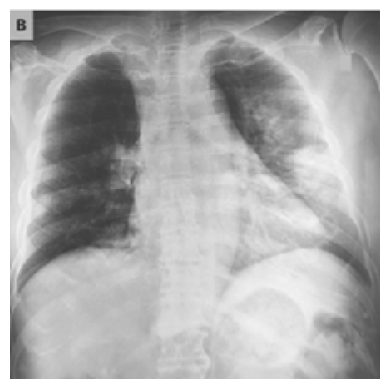

Predicted class: Viral Pneumonia lungs


In [114]:
# img_path = 'D:/Latihan_Python/Notebooks/Tugas Akhir/test/1.png'
# new_image = load_image(img_path, show=True)

# pred = model.predict(new_image)

# # Define the class labels
# class_labels = ['Normal Lungs', 'COVID-19 Infected', 'Viral Pneumonia lungs']

# # Get the predicted class index
# predicted_class = tf.argmax(pred, axis=1).numpy()[0]

# # Get the predicted label based on the class index
# predicted_label = class_labels[predicted_class]

# print(f"Predicted class: {predicted_label}")

In [18]:
# class_labels = ['Normal Lungs', 'COVID-19 Infected', 'Viral Pneumonia lungs']

# # Path to the folder containing the images
# folder_path = 'D:/Latihan_Python/Datasets/Split_Data/COVID'

# # Get the list of image files in the folder
# image_files = os.listdir(folder_path)

# # Limit the number of images to predict
# num_images = min(len(image_files), 100)
# image_files = image_files[:num_images]

# # Iterate over the image files and make predictions
# for file in image_files:
#     # Construct the path to the image file
#     img_path = os.path.join(folder_path, file)
    
#     # Load and preprocess the image
#     new_image = load_image(img_path)
    
#     # Make the prediction
#     pred = model.predict(new_image)
    
#     # Get the predicted class index
#     predicted_class = tf.argmax(pred, axis=1).numpy()[0]
    
#     # Get the predicted label based on the class index
#     predicted_label = class_labels[predicted_class]
    
#     # Print the file name and predicted label
#     print(f"Image: {file}, Predicted class: {predicted_label}")

Image: COVID-10.png, Predicted class: Viral Pneumonia lungs
Image: COVID-100.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1007.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1012.png, Predicted class: Viral Pneumonia lungs
Image: COVID-102.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1022.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1023.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1028.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1033.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1039.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1044.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1047.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1050.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1052.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1056.png, Predicted class: Viral Pneumonia lungs
Image: COVID-1058.png, Predicted class: Viral Pneumonia lungs
Image: COVID

In [ ]:
# import numpy as np
# from sklearn.metrics import classification_report

# # Load the test dataset and labels
# test_dataset = np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/Splited_dataset/test_dataset.npy')
# test_labels = np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/Splited_dataset/test_labels.npy')

# # Perform predictions on the test dataset using your model
# test_predictions = model.predict(test_dataset)

# # Convert the predicted probabilities into class labels
# test_predictions_classes = np.argmax(test_predictions, axis=1)
# test_labels_classes = np.argmax(test_labels, axis=1)

# # Generate the classification report
# class_names = ['Normal', 'COVID-19', 'Viral Pneumonia']
# classification_report = classification_report(test_labels_classes, test_predictions_classes, target_names=class_names)

# # Print the classification report
# print(classification_report)